In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [94]:
df = pd.read_csv('traffic.csv')
df.head()

,Timestamp,Road,Direction,Vehicle Count
0,2024-01-01 00:00:00,Main Street,Northbound,23
1,2024-01-01 00:26:00,Main Street,Northbound,31
2,2024-01-01 00:35:00,Main Street,Southbound,28
3,2024-01-01 00:53:00,Main Street,Westbound,27
4,2024-01-01 01:07:00,Main Street,Northbound,33


In [95]:
df.shape

(100, 4)

In [96]:
tk = df['Timestamp'][::5]

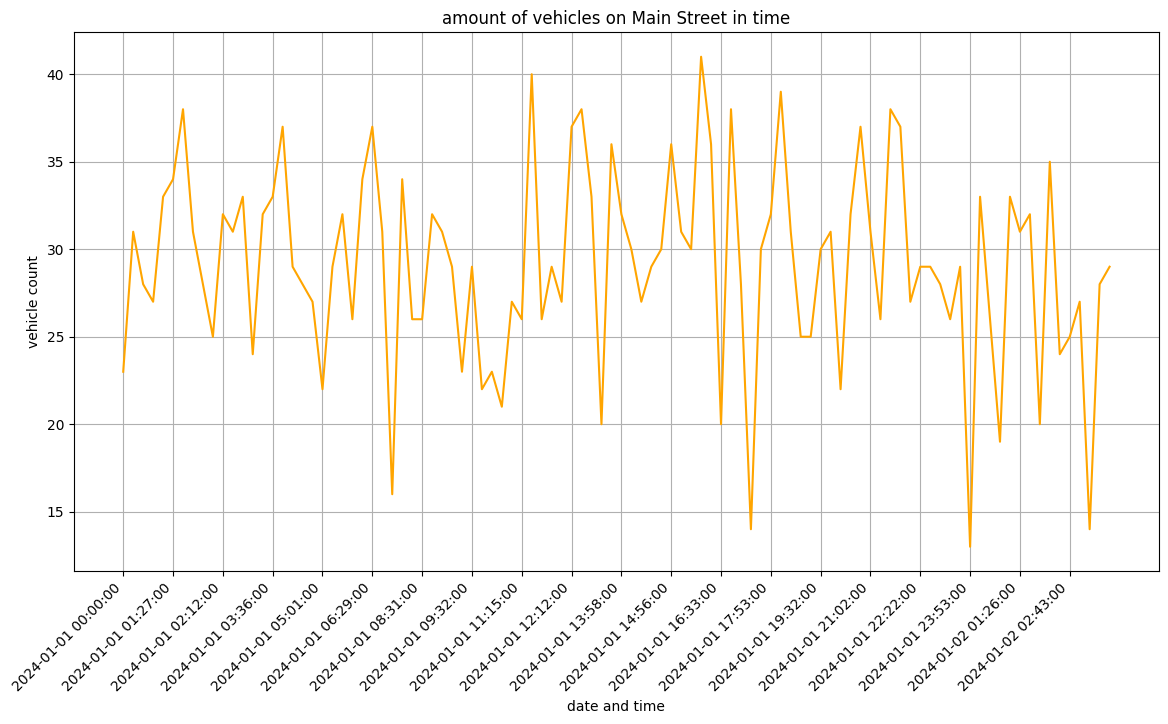

In [97]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(df['Timestamp'], df['Vehicle Count'], color='orange')

ax.set_xlabel('date and time')
ax.set_ylabel('vehicle count')
ax.set_title('amount of vehicles on Main Street in time')

plt.xticks(tk, rotation=45, ha='right')
plt.grid()

plt.show()

In [98]:
sample_rate = 2

x_values = np.array(np.arange(0, 100)[::sample_rate])
y_values = df['Vehicle Count'][::sample_rate]

In [99]:
from scipy.interpolate import CubicHermiteSpline

In [100]:
dydx = np.gradient(y_values)
x_interpolated0 = np.array(np.arange(0, len(df['Timestamp'])))

spline = CubicHermiteSpline(x_values, y_values, dydx)
y_interpolated0 = spline(x_interpolated0)

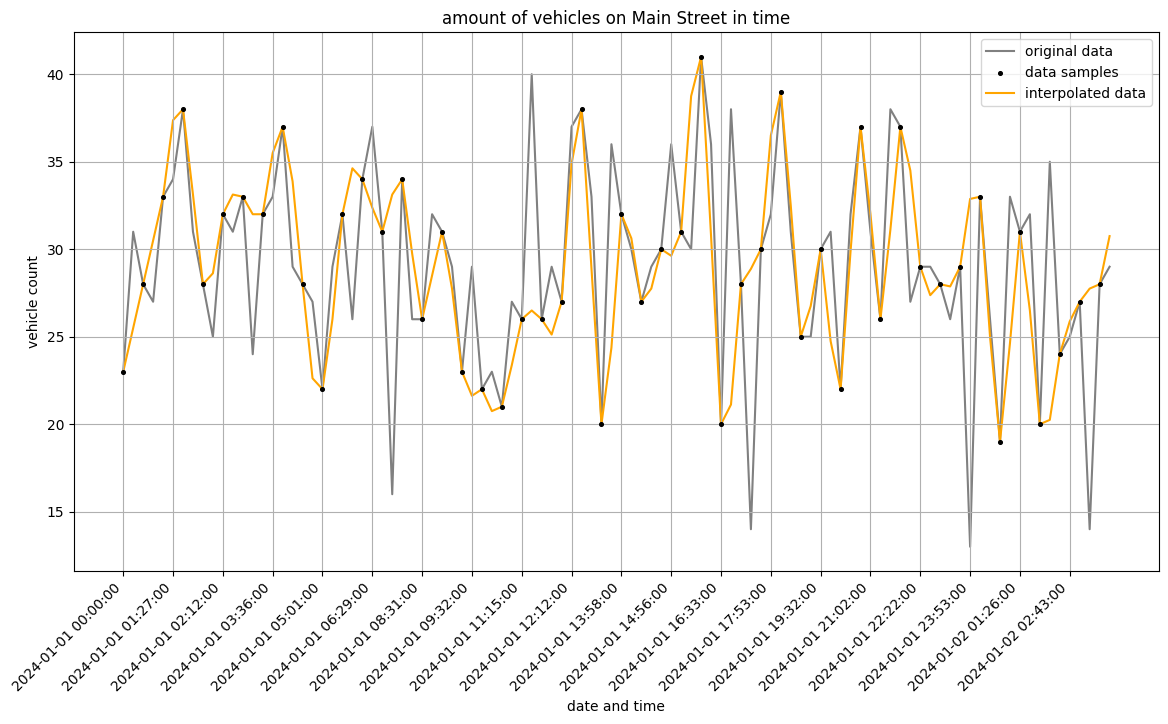

In [101]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(df['Timestamp'], df['Vehicle Count'], color='gray', zorder=0, label='original data')
ax.scatter(x_values, y_values, s=7, color='black', zorder=2, label='data samples')
ax.plot(x_interpolated0, y_interpolated0, color='orange', zorder=1, label='interpolated data')

ax.set_xlabel('date and time')
ax.set_ylabel('vehicle count')
ax.set_title('amount of vehicles on Main Street in time')
ax.legend(loc='upper right')

plt.xticks(tk, rotation=45, ha='right')
plt.grid()

plt.show()

In [102]:
from scipy.interpolate import splrep, splev

In [103]:
tck = splrep(x_values, y_values, k=4)
x_interpolated1 = np.array(np.arange(0, len(df['Timestamp'])))
y_interpolated1 = splev(x_interpolated1, tck)

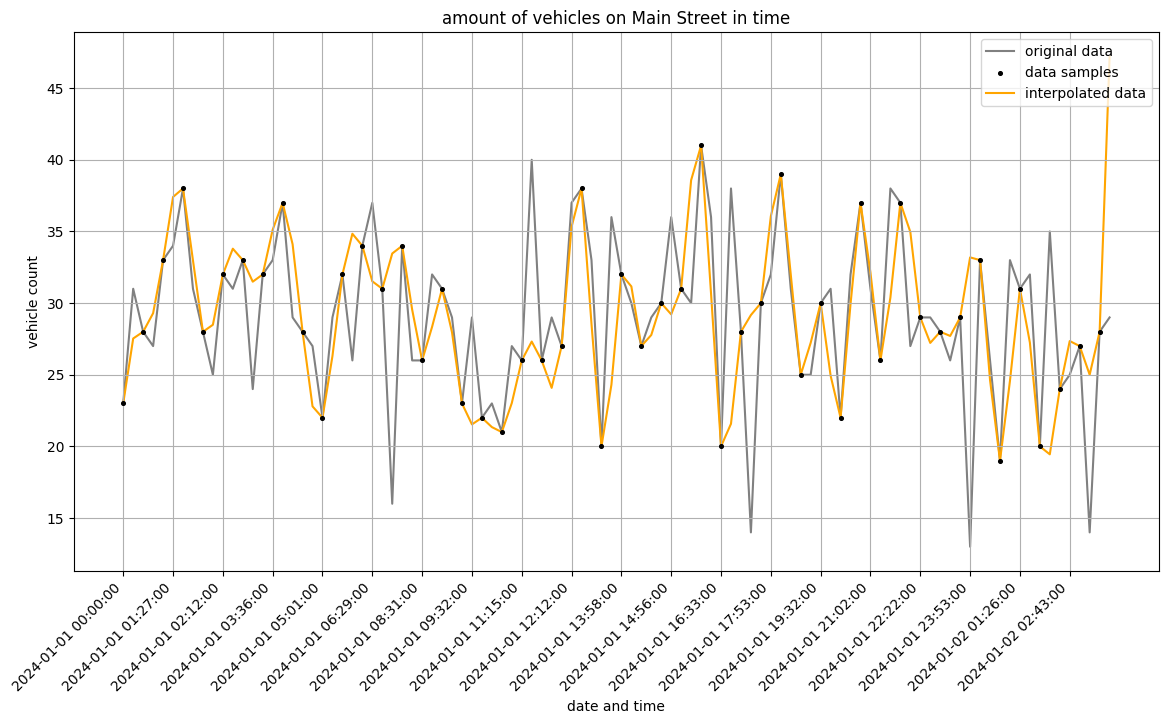

In [104]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(df['Timestamp'], df['Vehicle Count'], color='gray', zorder=0, label='original data')
ax.scatter(x_values, y_values, s=7, color='black', zorder=2, label='data samples')
ax.plot(x_interpolated1, y_interpolated1, color='orange', zorder=1, label='interpolated data')

ax.set_xlabel('date and time')
ax.set_ylabel('vehicle count')
ax.set_title('amount of vehicles on Main Street in time')
ax.legend(loc='upper right')

plt.xticks(tk, rotation=45, ha='right')
plt.grid()

plt.show()

In [105]:
abs_error0 = [abs(data - interp) for data, interp in zip(df['Vehicle Count'], y_interpolated0)]
abs_error1 = [abs(data - interp) for data, interp in zip(df['Vehicle Count'], y_interpolated1)]

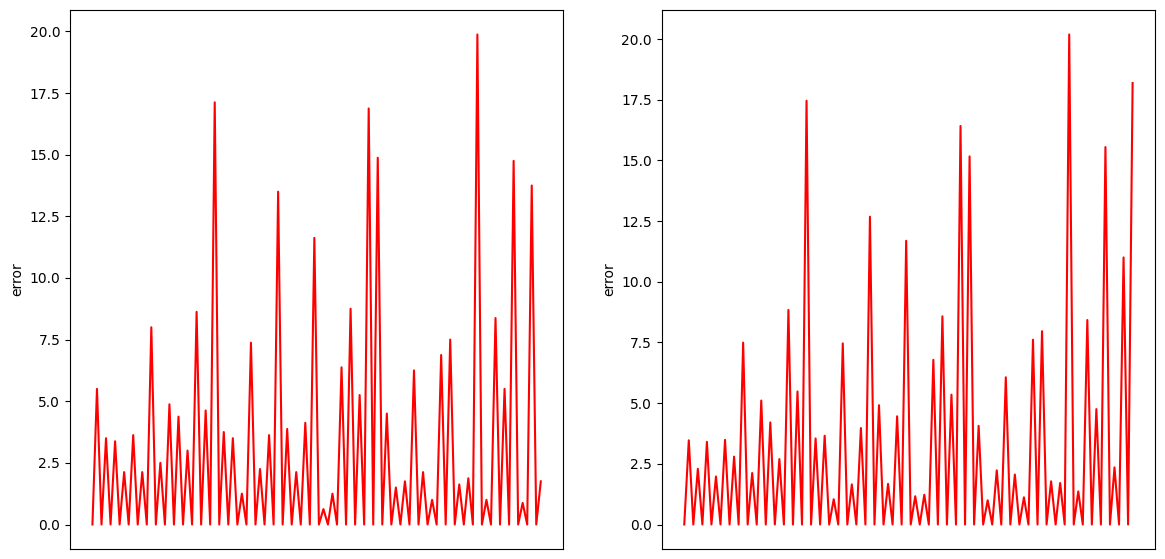

In [111]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 7))

axes[0].plot(df['Timestamp'], abs_error0, color='red')
axes[1].plot(df['Timestamp'], abs_error1, color='red')

axes[0].set_ylabel('error')
axes[1].set_ylabel('error')
axes[0].set_xticks([])
axes[1].set_xticks([])

plt.show()